# DAT210x - Programming with Python for DS

## Module6- Lab4

This code is intentionally missing! Read the directions on the course lab page!

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import matplotlib as mpl

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
iterations=5000
FAST_DRAW=True

In [3]:
def benchmark(model, X_train, X_test, y_train, y_test,wintitle='Figure 2'):
  print ('\n\n' + wintitle + ' Results')
  s = time.time()
  for i in range(iterations):    
    #
    # TODO: train the classifier on the training data / labels:
    #
    # .. your code here ..
    a = model.fit(X_train, y_train)
  print ("{0} Iterations Training Time: ".format(iterations), time.time() - s)


  s = time.time()
  for i in range(iterations):
    #
    # TODO: score the classifier on the testing data / labels:
    #
    # .. your code here ..
    score = a.score(X_test, y_test)
         
  print("{0} Iterations Scoring Time: ".format(iterations), time.time() - s)
  print("High-Dimensionality Score: ", round((score*100), 3))

In [4]:
def drawPlots(model, X_train, X_test, y_train, y_test,wintitle='Figure 1'):
  # INFO: A convenience function for you
  # You can use this to break any higher-dimensional space down
  # And view cross sections of it.

  # If this line throws an error, use plt.style.use('ggplot') instead
  mpl.style.use('ggplot') # Look Pretty

  padding = 3
  resolution = 0.5
  max_2d_score = 0

  y_colors = ['#ff0000', '#00ff00', '#0000ff']
  my_cmap = mpl.colors.ListedColormap(['#ffaaaa', '#aaffaa', '#aaaaff'])
  colors = [y_colors[i] for i in y_train]
  num_columns = len(X_train.columns)

  fig = plt.figure()
  fig.canvas.set_window_title(wintitle)
  
  cnt = 0
  for col in range(num_columns):
    for row in range(num_columns):
      # Easy out
      if FAST_DRAW and col > row:
        cnt += 1
        continue

      ax = plt.subplot(num_columns, num_columns, cnt + 1)
      plt.xticks(())
      plt.yticks(())

      # Intersection:
      if col == row:
        plt.text(0.5, 0.5, X_train.columns[row], verticalalignment='center', horizontalalignment='center', fontsize=12)
        cnt += 1
        continue


      # Only select two features to display, then train the model
      X_train_bag = X_train.ix[:, [row,col]]
      X_test_bag = X_test.ix[:, [row,col]]
      model.fit(X_train_bag, y_train)

      # Create a mesh to plot in
      x_min, x_max = X_train_bag.ix[:, 0].min() - padding, X_train_bag.ix[:, 0].max() + padding
      y_min, y_max = X_train_bag.ix[:, 1].min() - padding, X_train_bag.ix[:, 1].max() + padding
      xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                           np.arange(y_min, y_max, resolution))

      # Plot Boundaries
      plt.xlim(xx.min(), xx.max())
      plt.ylim(yy.min(), yy.max())

      # Prepare the contour
      Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
      Z = Z.reshape(xx.shape)
      plt.contourf(xx, yy, Z, cmap=my_cmap, alpha=0.8)
      plt.scatter(X_train_bag.ix[:, 0], X_train_bag.ix[:, 1], c=colors, alpha=0.5)


      score = round(model.score(X_test_bag, y_test) * 100, 3)
      plt.text(0.5, 0, "Score: {0}".format(score), transform = ax.transAxes, horizontalalignment='center', fontsize=8)
      max_2d_score = score if score > max_2d_score else max_2d_score

      cnt += 1

  print ("Max 2D Score: ", max_2d_score)
  fig.set_tight_layout(True)

In [5]:
df=pd.read_csv('Datasets/wheat.data',index_col=0)

In [6]:
df.head()

,area,perimeter,compactness,length,width,asymmetry,groove,wheat_type
id,,,,,,,,
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,kama
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,kama
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,kama
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,kama
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,kama


In [7]:
df.dropna(axis=0,inplace=True)

In [8]:
y=df.wheat_type

df.drop('wheat_type',axis=1,inplace=True)

In [9]:
y.unique()

array(['kama', 'canadian', 'rosa'], dtype=object)

In [10]:
y=y.map({'kama':0,'canadian':1,'rosa':2})

In [11]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test=train_test_split(df,y,test_size=0.3,random_state=7)
#  data_train, data_test, labels_train, labels_test

/home/akarsh/.local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
from sklearn import tree
tr=tree.DecisionTreeClassifier(max_depth = 9, random_state=2)

In [13]:
from sklearn import svm
svc=svm.SVC(kernel = 'linear',C=1)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)



tree Results
5000 Iterations Training Time:  5.268383502960205
5000 Iterations Scoring Time:  2.735788106918335
High-Dimensionality Score:  91.803


/usr/lib/python3/dist-packages/ipykernel_launcher.py:41: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/usr/lib/python3/dist-packages/ipykernel_launcher.py:42: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/usr/lib/python3/dist-packages/ipykernel_launcher.py:46: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/usr/lib/python3/dist-packages/ipykernel_launcher.py:47: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for 

Max 2D Score:  90.164


/home/akarsh/.local/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


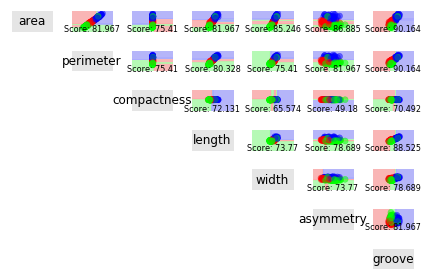

In [15]:
benchmark(tr, X_train, X_test, y_train, y_test,'tree')
drawPlots(tr,X_train, X_test, y_train, y_test, 'tree')



SVM Results
5000 Iterations Training Time:  6.638796329498291
5000 Iterations Scoring Time:  3.239508628845215
High-Dimensionality Score:  86.885


/usr/lib/python3/dist-packages/ipykernel_launcher.py:41: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/usr/lib/python3/dist-packages/ipykernel_launcher.py:42: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/usr/lib/python3/dist-packages/ipykernel_launcher.py:46: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/usr/lib/python3/dist-packages/ipykernel_launcher.py:47: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for 

Max 2D Score:  93.443


/home/akarsh/.local/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


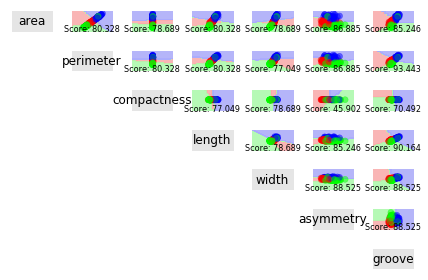

In [16]:
benchmark(svc, X_train, X_test, y_train, y_test,'SVM')
drawPlots(svc,X_train, X_test, y_train, y_test, 'SVM')



KNeighbors Results
5000 Iterations Training Time:  3.365095853805542
5000 Iterations Scoring Time:  7.243629217147827
High-Dimensionality Score:  83.607


/usr/lib/python3/dist-packages/ipykernel_launcher.py:41: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/usr/lib/python3/dist-packages/ipykernel_launcher.py:42: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/usr/lib/python3/dist-packages/ipykernel_launcher.py:46: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/usr/lib/python3/dist-packages/ipykernel_launcher.py:47: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for 

Max 2D Score:  90.164


/home/akarsh/.local/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


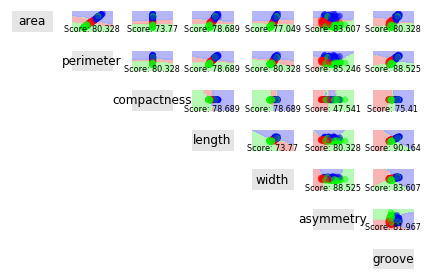

In [17]:
benchmark(knn, X_train, X_test, y_train, y_test,'KNeighbors')
drawPlots(knn,X_train, X_test, y_train, y_test, 'KNeighbors')